# LeNet Code in Tensorflow

Authors: Anirudh BH, Manan Sharma

Import all Libraries

In [0]:
# Uncomment this line when using Google Colab
# %tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import the Dataset

The MNIST Dataset is avaiable in the Keras library. IT can be directly imported from it

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Model Definition

Define the LeNet Model uding the Sequential block in tf.keras.<br/>

The base paper for the LeNet architecture can be found [here](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)

In [3]:
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(28,28,1)),
                             tf.keras.layers.Conv2D(6,(5,5), activation=tf.keras.activations.tanh, padding='same'),
                             tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),
                             tf.keras.layers.Activation(tf.nn.tanh),
                             tf.keras.layers.Conv2D(16,(5,5), activation=tf.keras.activations.tanh),
                             tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)),
                             tf.keras.layers.Activation(tf.nn.tanh),
                             tf.keras.layers.Conv2D(120, (5,5), activation=tf.keras.activations.tanh),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(84, activation=tf.keras.activations.tanh),
                             tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         4

# Model Compilation

Add the Loss functions and the Optimizer to the model.<br/>
The Loss function used here is the Sparse Categorical Cross Entropy.<br/>
The Optimizer used is the Adam Optimizer.<br/>

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(),  # Optimizer
              # Loss function to minimize
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # List of metrics to monitor
              metrics=['sparse_categorical_accuracy'])

# Model Fitting

The defined LeNet model is fitted on the the Training data (MNIST).<br/>
Batch Size is kept as 64..<br/>
The Model is run for 12 epochs

In [5]:
print('# Fit model on training data')
history = model.fit(x_train[:,:,:,np.newaxis], y_train,
                    batch_size=64,
                    epochs=12)

# Fit model on training data
Epoch 1/12
938/938 [==============================] - 5s 5ms/step - loss: 1.5358 - sparse_categorical_accuracy: 0.9403
Epoch 2/12
938/938 [==============================] - 5s 5ms/step - loss: 1.4876 - sparse_categorical_accuracy: 0.9761
Epoch 3/12
938/938 [==============================] - 5s 5ms/step - loss: 1.4820 - sparse_categorical_accuracy: 0.9806
Epoch 4/12
938/938 [==============================] - 5s 5ms/step - loss: 1.4780 - sparse_categorical_accuracy: 0.9846
Epoch 5/12
938/938 [==============================] - 5s 5ms/step - loss: 1.4767 - sparse_categorical_accuracy: 0.9855
Epoch 6/12
938/938 [==============================] - 5s 5ms/step - loss: 1.4749 - sparse_categorical_accuracy: 0.9873
Epoch 7/12
938/938 [==============================] - 5s 5ms/step - loss: 1.4732 - sparse_categorical_accuracy: 0.9885
Epoch 8/12
938/938 [==============================] - 5s 5ms/step - loss: 1.4724 - sparse_categorical_accuracy: 0.9894
Epoch 9/12
938/938 

# Plot the Traning Loss


history dict: {'loss': [1.5357530117034912, 1.487646222114563, 1.4820129871368408, 1.4779502153396606, 1.4767131805419922, 1.4748766422271729, 1.4731944799423218, 1.4724071025848389, 1.4717592000961304, 1.4711942672729492, 1.4714479446411133, 1.4698097705841064], 'sparse_categorical_accuracy': [0.9402833580970764, 0.9761333465576172, 0.980566680431366, 0.9845666885375977, 0.985450029373169, 0.987333357334137, 0.9884999990463257, 0.9894333481788635, 0.990149974822998, 0.9906833171844482, 0.9903666377067566, 0.9917166829109192]}


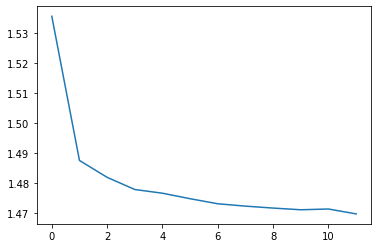

In [6]:
print('\nhistory dict:', history.history)

plt.plot(history.history['loss'])
plt.show()

# Evaluate the Trained Model on the Test Data

The .evaluate() command is used 

In [8]:
print('\n# Evaluating on test data')
results = model.evaluate(x_test[:,:,:,np.newaxis], y_test, batch_size=128)
print('test loss, test acc:', results)


# Evaluating on test data
79/79 [==============================] - 0s 4ms/step - loss: 1.4754 - sparse_categorical_accuracy: 0.9861
test loss, test acc: [1.4753748178482056, 0.9861000180244446]
